<a href="https://colab.research.google.com/github/anasabbad/Student-Performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Loading the data set**

In [27]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the data
data= pd.read_csv('/content/drive/MyDrive/DataSets/exams.csv').replace([np.inf, -np.inf], np.nan)

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Adding a new column for Total Score**

In [11]:
data["Total_Score"]= data["math score"]+data["reading score"]+data["writing score"]

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219




*   We can see that our target variable is Total_Score. So we will calculate the  Mean, Median, Variance and Standard deviation for this variable
*   To compute the Mode, we will use Race/ethnicity variable as it is a Categorical variable



# Descriptive statistics for Continuous Variables

In [18]:
data.describe()

,math score,reading score,writing score,Total_Score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,203.136000
std,15.402871,14.737272,15.600985,43.542732
min,13.000000,27.000000,23.000000,65.000000
25%,56.000000,60.000000,58.000000,175.750000
50%,66.500000,70.000000,68.000000,202.000000
75%,77.000000,79.000000,79.000000,235.000000
max,100.000000,100.000000,100.000000,300.000000


## Descriptive Statistics for Categorical Variables

In [17]:
data.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,517,323,222,652,665


Here **top** represents the **mode** of the the categorical variable

# Variance

In [23]:
data.var(numeric_only=True)

math score        237.248432
reading score     217.187183
writing score     243.390747
Total_Score      1895.969473
dtype: float64


# Inter Quartile Range (IQR)

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_data = data.select_dtypes(include=numerics)

In [32]:
#define function to calculate interquartile range
def iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

#calculate IQR for 'rating' and 'points' columns
numerical_data.apply(iqr)

math score       21.00
reading score    19.00
writing score    21.00
Total_Score      59.25
dtype: float64

# Box Plot & Distribution of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


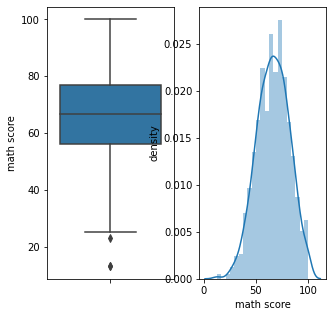

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


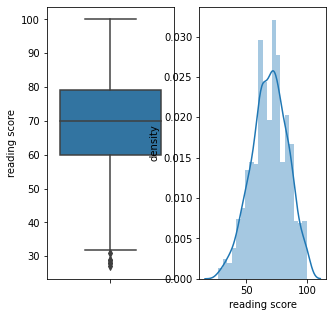

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


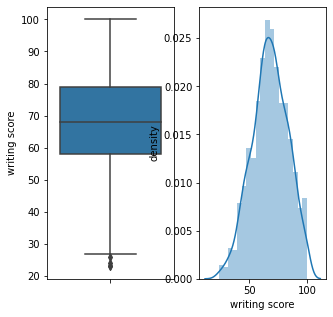

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


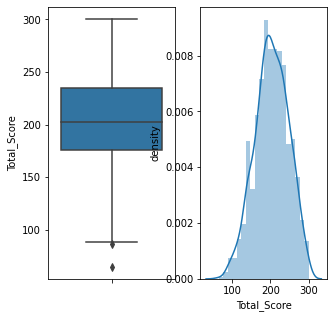

In [40]:
for var in numerical_data:
    plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('density')
    fig.set_xlabel(var)

    plt.show()

**We can notice that  all the variables are almost Normally Distributed with some outliers present**